In [177]:
# we will be performing lineae regrerssion


# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [178]:
# loading data set
boston=pd.read_csv("archive.zip")
type(boston)

pandas.core.frame.DataFrame

In [179]:
# axis vlaues
boston.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [180]:
boston.rename(columns={"MEDV":"PRICE"},inplace=True)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [181]:
boston.info() 
# datatypes information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [182]:
# changing datatype of RAD to float
boston.RAD=boston.RAD.astype(float)
boston.TAX=boston.TAX.astype(float)
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


no cateogorial data so preprocessing will be simple

In [183]:
# summarizing the stats
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [184]:
# check the missing vlaues
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [185]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
PRICE       0
dtype: int64

In [186]:
boston.count()

CRIM       486
ZN         486
INDUS      486
CHAS       486
NOX        506
RM         506
AGE        486
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      486
PRICE      506
dtype: int64

In [187]:
# since some of the data is missing and we cannot drop data becase it is less hence, missing value are filled with mean

boston['CRIM']=boston["CRIM"].astype(float).interpolate()  #mean
boston['ZN']=boston['ZN'].interpolate()                 #interpolate
boston['INDUS']=boston["INDUS"].ffill()                 #fills with forward vlaue
boston['CHAS']=boston["CHAS"].bfill()                   #fills with backward vlaues
boston['AGE']=boston["AGE"].interpolate()  #median
boston['LSTAT']=boston["LSTAT"].interpolate()
# boston['CRIM']=boston["CRIM"].fillna(boston.CRIM.mean)

In [188]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [189]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [190]:
# EXPLORATIRY DATA ANALYSIS

# 1. correalation --> high correalation means high model performance
#  if there is high corealtion between two independent values then we can remove one  (multicolinearity)

boston.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.203199,0.408706,-0.055647,0.417923,-0.215651,0.350252,-0.381482,0.629471,0.586332,0.292004,-0.399875,0.454214,-0.385786
ZN,-0.203199,1.000000,-0.536552,-0.040231,-0.517740,0.317351,-0.570859,0.657073,-0.314503,-0.318057,-0.399008,0.178327,-0.415180,0.368088
INDUS,0.408706,-0.536552,1.000000,0.054064,0.763651,-0.391676,0.643497,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.604810,-0.483725
CHAS,-0.055647,-0.040231,0.054064,1.000000,0.070867,0.106797,0.085614,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.053075,0.183844
NOX,0.417923,-0.517740,0.763651,0.070867,1.000000,-0.302188,0.731471,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.592196,-0.427321
RM,-0.215651,0.317351,-0.391676,0.106797,-0.302188,1.000000,-0.241441,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614947,0.695360
AGE,0.350252,-0.570859,0.643497,0.085614,0.731471,-0.241441,1.000000,-0.742121,0.452694,0.505108,0.262821,-0.272006,0.598779,-0.376922
DIS,-0.381482,0.657073,-0.708027,-0.092318,-0.769230,0.205246,-0.742121,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.502249,0.249929
RAD,0.629471,-0.314503,0.595129,-0.003339,0.611441,-0.209847,0.452694,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.492782,-0.381626
TAX,0.586332,-0.318057,0.720760,-0.035822,0.668023,-0.292048,0.505108,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.546743,-0.468536


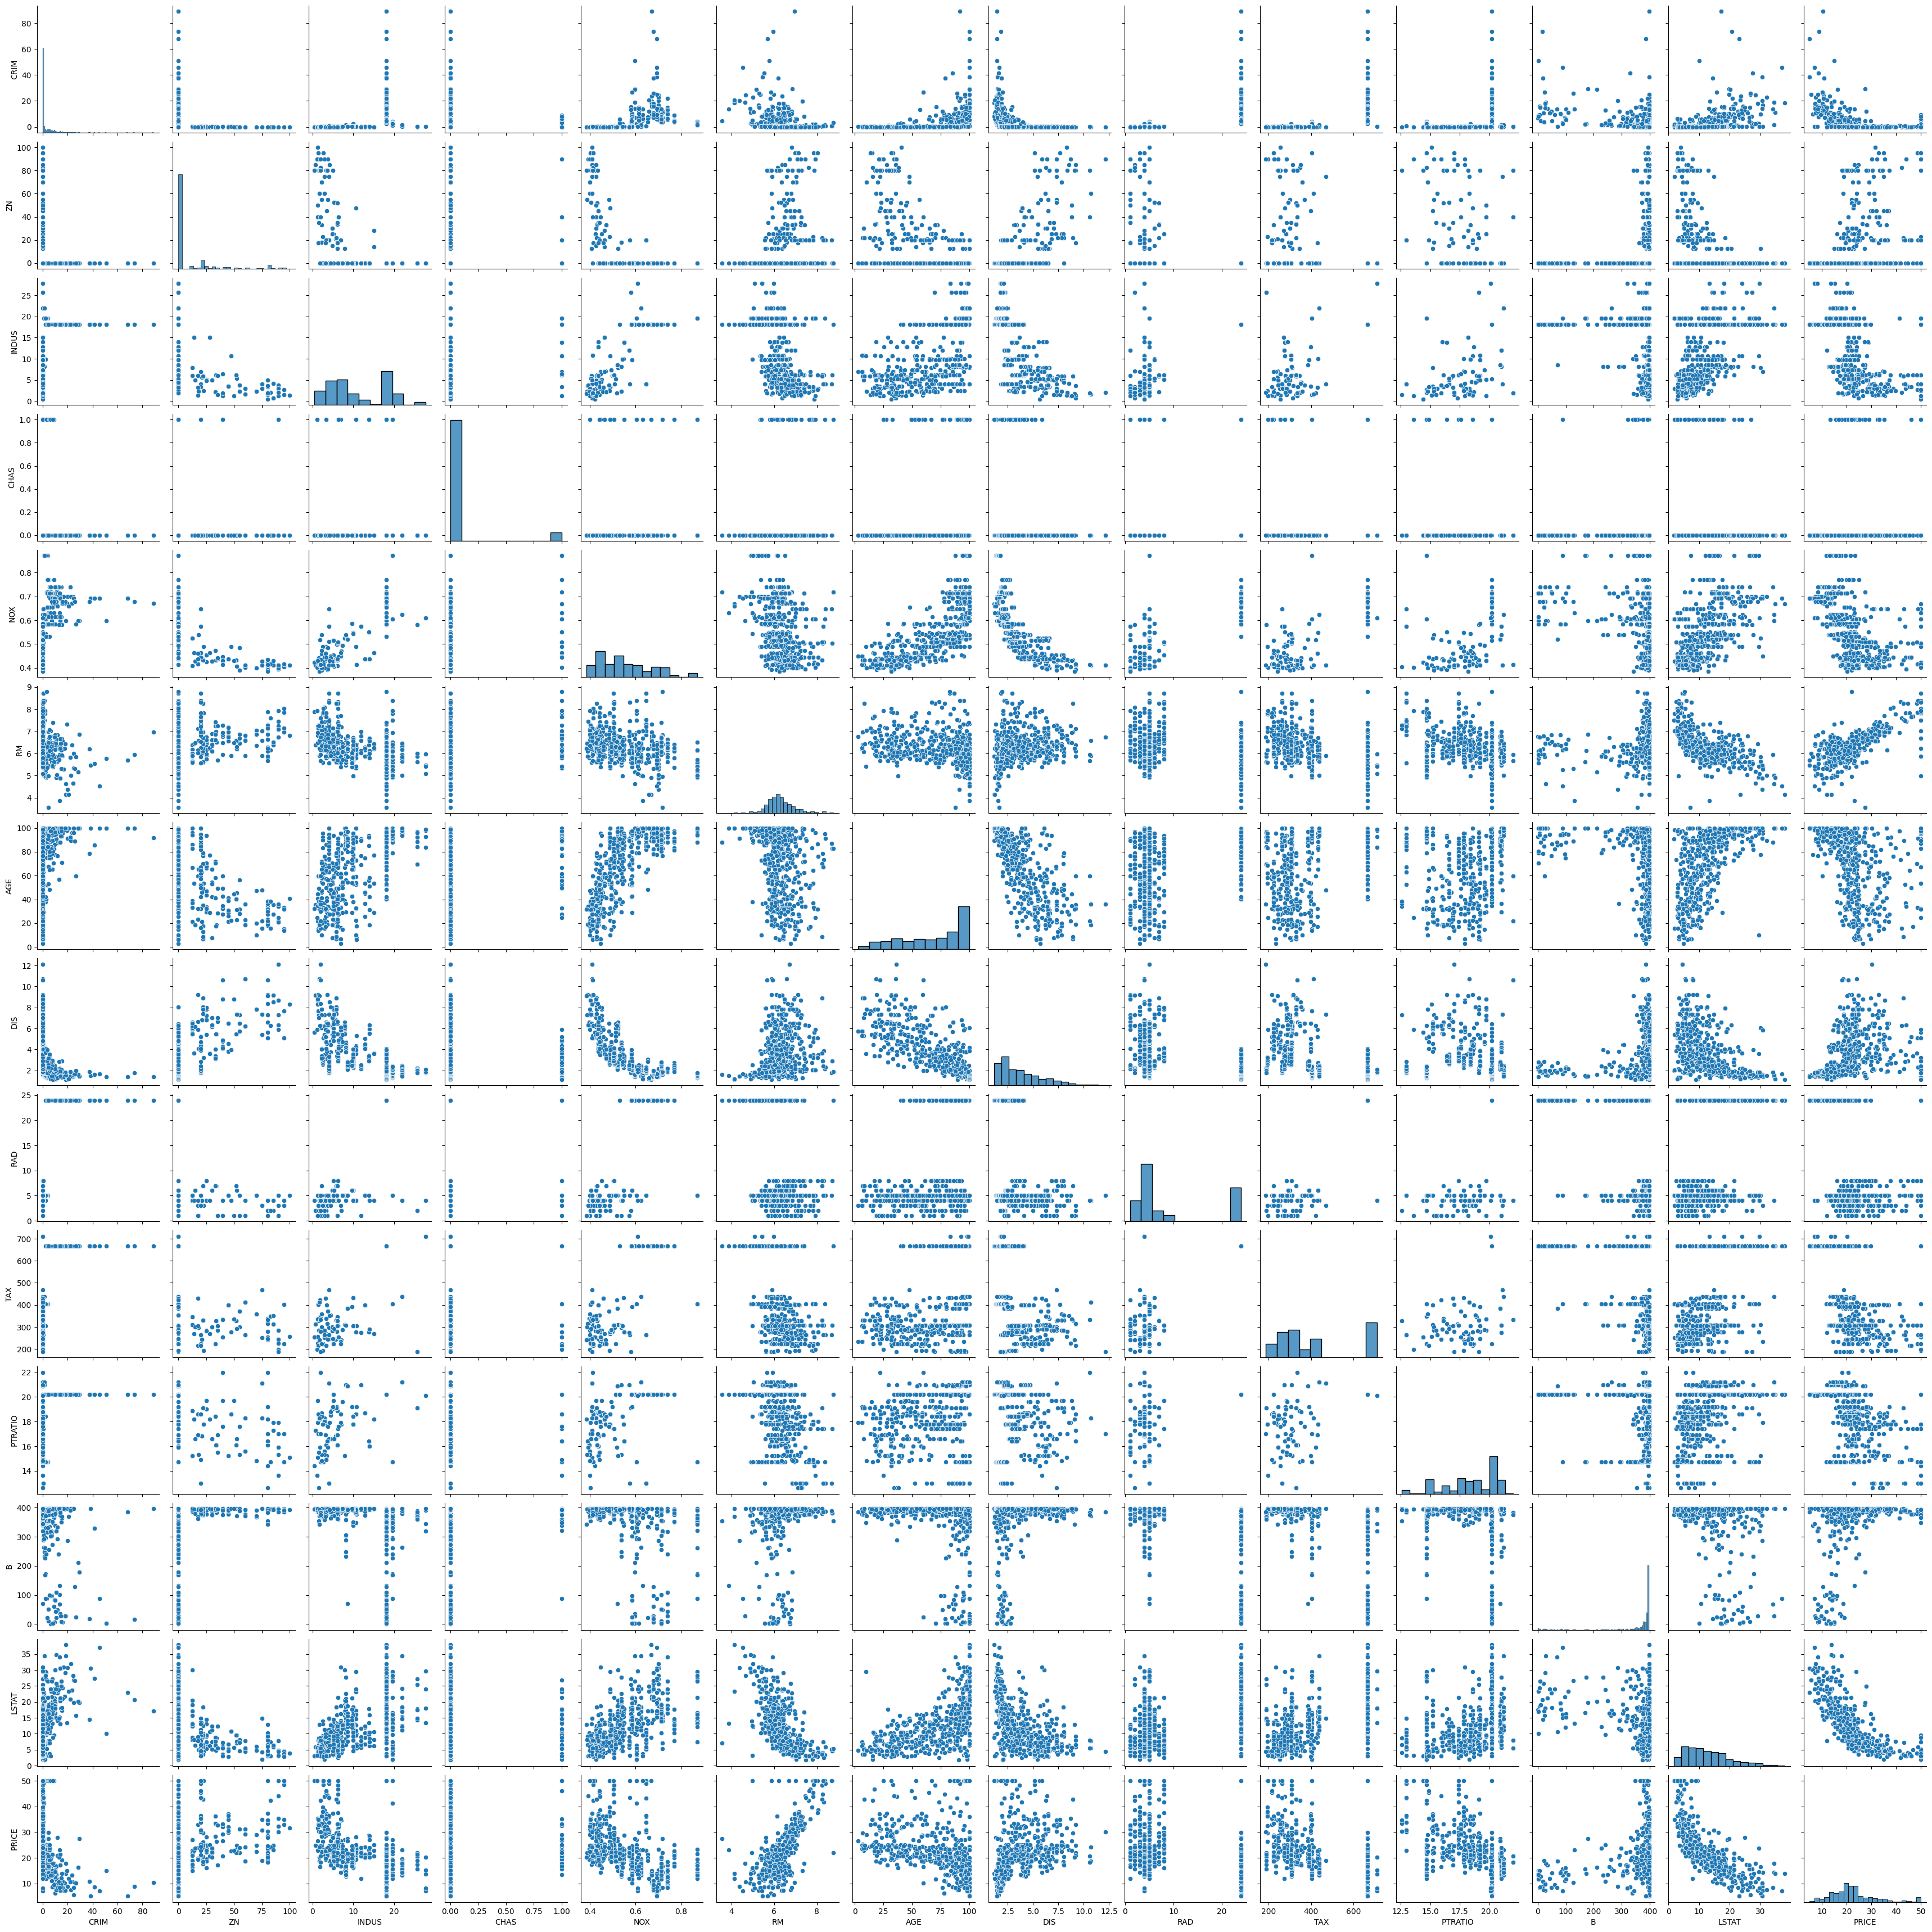

In [191]:
#graphical representation of correaltion
import seaborn as sns
sns.pairplot(boston)

Text(0, 0.5, 'price')

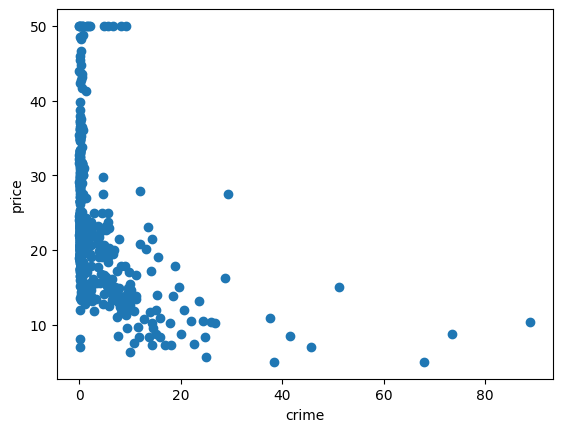

In [192]:
plt.scatter(boston['CRIM'],boston['PRICE'])
plt.xlabel('crime')
plt.ylabel('price')

Text(0, 0.5, 'PRICE')

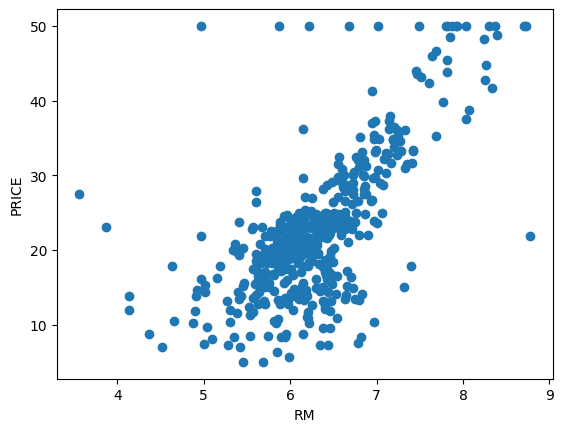

In [193]:
plt.scatter(boston['RM'],boston['PRICE'])
plt.xlabel("RM")
plt.ylabel("PRICE")

<Axes: xlabel='RM', ylabel='PRICE'>

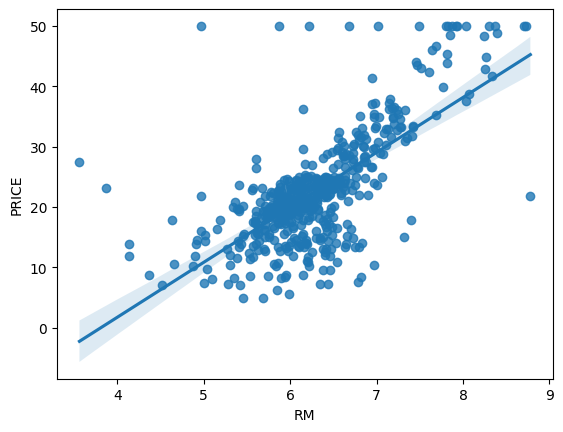

In [194]:
import seaborn as sns
sns.regplot(x='RM',y='PRICE',data=boston)

<Axes: xlabel='LSTAT', ylabel='PRICE'>

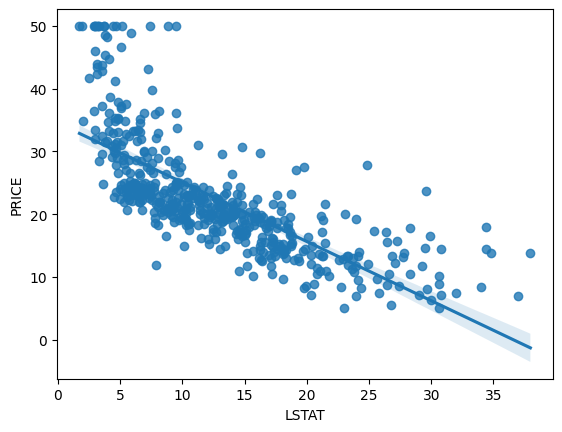

In [195]:
sns.regplot(x='LSTAT',y='PRICE',data=boston)

In [196]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.980,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.140,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.030,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.940,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,4.075,36.2


In [197]:
# DEPENDED AND INDEPEMDENT FEATURES
# price is depended feature and all other features are independent

x=boston.iloc[:,:-1]
y=boston.iloc[:,-1]


In [198]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.980
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.140
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.030
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.940
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,4.075
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,11.705
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.080
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.640
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.480


In [199]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [200]:
# train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [201]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,13.03
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [202]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,78.6,2.6463,5.0,296.0,16.6,395.50,9.040000
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.530000
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.070000
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.520000
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.270000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0.0,0.740,6.406,97.2,2.0651,24.0,666.0,20.2,385.96,18.686667
23,0.98843,0.0,8.14,0.0,0.538,5.813,100.0,4.0952,4.0,307.0,21.0,394.54,19.880000
225,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.630000
433,5.58107,0.0,18.10,0.0,0.713,6.436,87.9,2.3158,24.0,666.0,20.2,100.19,16.220000


In [203]:
# standardizing the dataset-->to make all the units of same sclae usefull in gradient descent and to make sure that one parameter does not over-influence the prediction
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [204]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)  #transform because same methods which are applied on train dataset are on test dataset aslo

In [205]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: PRICE, Length: 152, dtype: float64

In [206]:
# MODEL TRAINING
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [207]:
regression.fit(x_train,y_train)

LinearRegression()

In [208]:
regression.coef_  #for every independent feature we have an coefficient

# The coefficients indicate the change in the target variable for a one-unit change in the respective feature, assuming all other features are constant.

# R-squared (R²) measures the proportion of the variance in the dependent variable that is predictable from the independent variables. An R² value closer to 1 indicates a better fit.

array([-1.17361674,  0.86666121,  0.31519356,  0.87874018, -1.80432524,
        2.89622512, -0.3651704 , -3.04279197,  2.13033215, -1.46443247,
       -2.0593754 ,  1.00288352, -3.78589986])

In [209]:
regression.intercept_
# is a key component of the regression equation. It represents the predicted value of the dependent variable (the target) when all the independent variables (features) are set to zero. In other words, it's the point where the regression line crosses the y-axis when the independent variables are at their zero value.

23.01581920903955

In [210]:
# parameters on which model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [211]:
# prediction with test data
reg_pred=regression.predict(x_test)

In [212]:
reg_pred

array([28.70925906, 36.84852854, 15.37905083, 25.379525  , 18.8877037 ,
       23.09261679, 17.53824938, 14.20030139, 22.99106943, 20.64713686,
       25.18229143, 18.46830971, -6.69179851, 21.75747486, 19.17363634,
       23.74490916, 20.30365687,  5.8316261 , 40.51343185, 17.58151207,
       25.50126497, 30.27244591, 11.00189268, 22.91090366, 18.11156103,
       15.98427665, 23.26075806, 14.65290379, 22.64825739, 19.37959131,
       22.24437219, 25.12324081, 25.20541426, 18.47732471, 16.72880789,
       17.546691  , 30.77506586, 20.16650969, 24.2462252 , 25.61765499,
       14.09978678, 31.88527039, 42.68360645, 17.63244648, 27.01829217,
       17.22866112, 13.82636452, 26.09296757, 20.33402986, 30.0255216 ,
       21.2183485 , 33.86438449, 15.6088229 , 26.0515539 , 39.31750364,
       22.96789314, 18.97136978, 33.15312388, 24.82824488, 12.88721691,
       22.57552852, 30.80735694, 31.67069285, 16.39398613, 20.88326369,
       16.9659227 , 20.37819062, 26.16081246, 31.1820199 , 12.14

In [213]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: PRICE, Length: 152, dtype: float64

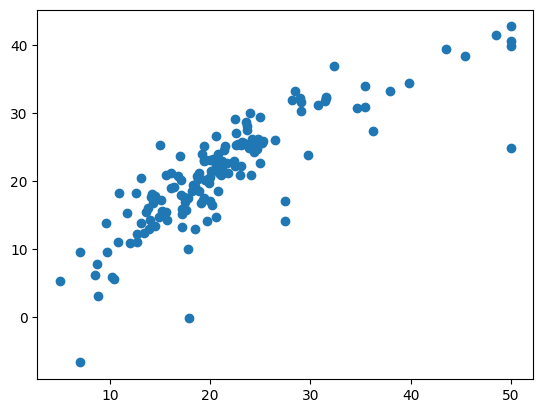

In [214]:
# scatter plot for prediction and acutal value

plt.scatter(y_test,reg_pred)

In [215]:
residuals=y_test-reg_pred
residuals

173    -5.109259
274    -4.448529
491    -1.779051
72     -2.579525
452    -2.787704
         ...    
441    -0.778197
23      1.109187
225    10.156665
433    -2.474415
447    -5.669460
Name: PRICE, Length: 152, dtype: float64

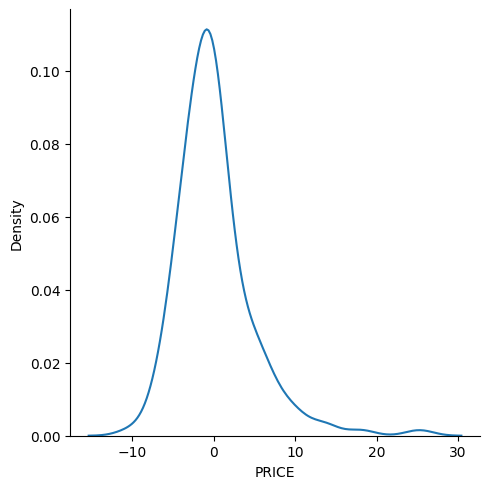

In [216]:
sns.displot(residuals,kind='kde')
# not a normal distribution completely since outliears are present
# model is good since errors are normally distributed

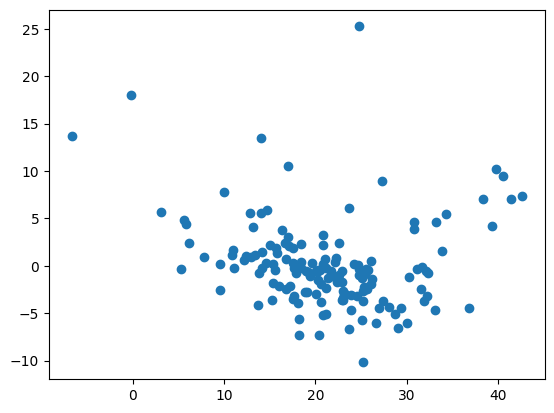

In [217]:
plt.scatter(reg_pred,residuals)
# uniform distribution-->model performing well

In [222]:
# analyzing error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


print(mean_absolute_error(y_test,reg_pred))
print(root_mean_squared_error(y_test,reg_pred))
print(r2_score(y_test,reg_pred))  #closer to 1 is better

# R-squared (R²) is a statistical measure that represents the proportion of the variance in the dependent variable (the target) that is predictable from the independent variables (the features). It provides an indication of how well the independent variables explain the variability of the target variable.

# Adjusted R-squared is a modified version of R-squared that adjusts for the number of predictors (independent variables) in the model. Unlike R-squared, which always increases when you add more variables, adjusted R-squared can decrease if the added variable does not improve the model. This adjustment makes it more suitable for comparing models with different numbers of predictors.

3.1825670751741733
4.680321189147342
0.7060193746261689


In [232]:
# NEW PREDICTION DATA

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.980,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.140,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.030,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.940,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,4.075,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,11.705,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.080,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.640,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.480,22.0


In [235]:
# PICKLING MODEL FILE FOR DEPLOYMENT

# Pickling is the process of serializing a Python object structure into a byte stream. This serialized byte stream can then be saved to a file or transferred over a network, and later reconstructed back into the original object by unpickling (or deserializing).

import pickle
pickle.dump(regression,open('regmod.pkl','wb'))   

#  model     file   mode

# file createwd

In [236]:
pickled_model=pickle.load(open('regmod.pkl','rb'))
# this acts as good as our model

In [237]:
pickled_model.predict(x_test)

array([28.70925906, 36.84852854, 15.37905083, 25.379525  , 18.8877037 ,
       23.09261679, 17.53824938, 14.20030139, 22.99106943, 20.64713686,
       25.18229143, 18.46830971, -6.69179851, 21.75747486, 19.17363634,
       23.74490916, 20.30365687,  5.8316261 , 40.51343185, 17.58151207,
       25.50126497, 30.27244591, 11.00189268, 22.91090366, 18.11156103,
       15.98427665, 23.26075806, 14.65290379, 22.64825739, 19.37959131,
       22.24437219, 25.12324081, 25.20541426, 18.47732471, 16.72880789,
       17.546691  , 30.77506586, 20.16650969, 24.2462252 , 25.61765499,
       14.09978678, 31.88527039, 42.68360645, 17.63244648, 27.01829217,
       17.22866112, 13.82636452, 26.09296757, 20.33402986, 30.0255216 ,
       21.2183485 , 33.86438449, 15.6088229 , 26.0515539 , 39.31750364,
       22.96789314, 18.97136978, 33.15312388, 24.82824488, 12.88721691,
       22.57552852, 30.80735694, 31.67069285, 16.39398613, 20.88326369,
       16.9659227 , 20.37819062, 26.16081246, 31.1820199 , 12.14

In [ ]:
# MODEL CREATED NOW WE WILL DO DEPLOYMENT